# Pythonで基礎から機械学習 勾配降下法

## 勾配降下法とは



## 単回帰分析を勾配法で計算
### データ読み込み

In [ ]:
!wget https://raw.githubusercontent.com/karaage0703/machine-learning-study/master/data/karaage_data.csv

In [1]:
import pandas as pd

df = pd.read_csv('karaage_data.csv')
df.head()

,x,y
0,1,2
1,2,3
2,5,2
3,10,3
4,28,4


In [2]:
x = df[['x']].values
y = df[['y']].values

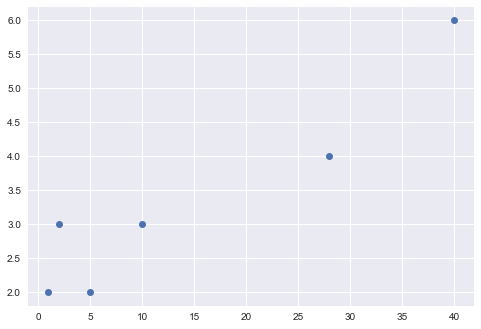

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(x, y, 'o')
plt.show()

### 初期化処理

In [4]:
import numpy as np

In [5]:
# 繰り返し回数（10より大きい数を入れる）
EPOCHS = 50

# 学習率
LEARNING_RATE = 0.01

勾配法実装

In [6]:
def pred(x, w):
    return x @ w

def gradient_method(x, y, epochs=EPOCHS):
    # 重みベクトル初期化
    w = np.ones(x.shape[1])
    # 結果履歴初期化
    history = np.zeros((0,2))

    # 逐次計算（学習）
    for i in range(epochs):
        yp = pred(x, w)
        yd = yp - y
        w = w - LEARNING_RATE * (x.T @ yd) / x.shape[0]
        if ( i % ((int)(EPOCHS / 10)) == 0):
            loss = np.mean(yd ** 2) / 2
            history = np.vstack((history, np.array([i, loss])))

    return w, history

データ読み込み

In [7]:
import pandas as pd

df = pd.read_csv('karaage_data.csv')
df.head()

x = df[['x']].values
x = np.insert(x, 0, 1.0, axis=1)
y = df[['y']].values.T[0]

In [8]:
weights, history = gradient_method(x, y, epochs=EPOCHS)

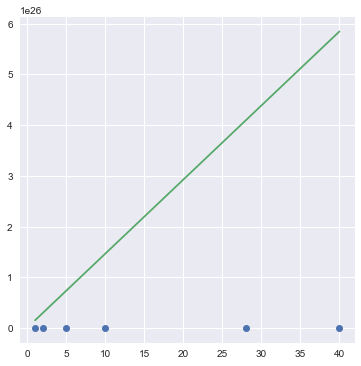

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

xall = x[:,1].ravel()
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, weights)

plt.figure(figsize=(6,6))
plt.plot(x[:,1], y, 'o')
plt.plot(xl[:,1], yl, linestyle="solid")
plt.show()

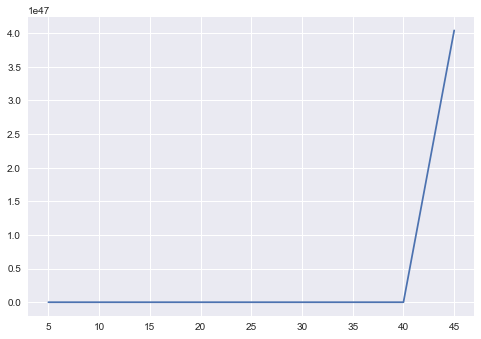

In [10]:
# 学習曲線の表示 (最初の1個分を除く)
plt.plot(history[1:,0], history[1:,1])
plt.show()

In [11]:
LEARNING_RATE = 0.001

In [12]:
import pandas as pd

df = pd.read_csv('karaage_data.csv')
df.head()

x = df[['x']].values
x = np.insert(x, 0, 1.0, axis=1)
y = df[['y']].values.T[0]

In [13]:
weights, history = gradient_method(x, y, epochs=EPOCHS)

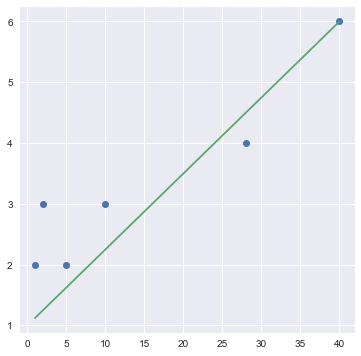

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

xall = x[:,1].ravel()
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, weights)

plt.figure(figsize=(6,6))
plt.plot(x[:,1], y, 'o')
plt.plot(xl[:,1], yl, linestyle="solid")
plt.show()

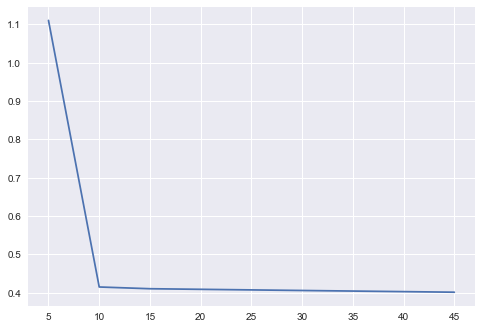

In [15]:
# 学習曲線の表示 (最初の1個分を除く)
plt.plot(history[1:,0], history[1:,1])
plt.show()

## 重回帰分析を勾配法で計算

In [ ]:
!wget http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv

In [16]:
import pandas as pd

df = pd.read_csv('winequality-red.csv', sep=';')

x = df[['density', 'volatile acidity']]
y = df[['alcohol']]

x = x.values
x = np.insert(x, 0, 1.0, axis=1)
y = y.values.T[0]

In [19]:
# 繰り返し回数（10より大きい数を入れる）
EPOCHS = 50

# 学習率
LEARNING_RATE = 0.01

In [20]:
weights, history = gradient_method(x, y, epochs=EPOCHS)

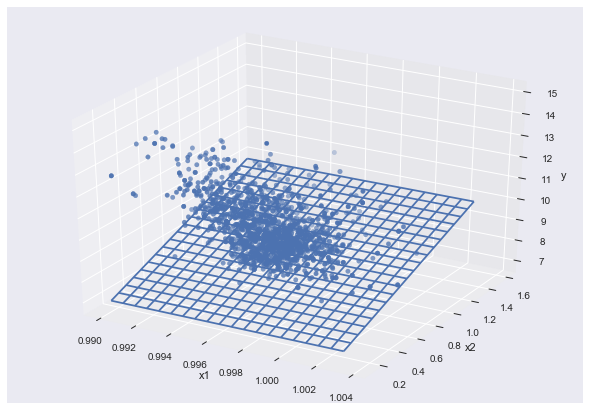

In [21]:
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure()
ax=Axes3D(fig)

y = df[['alcohol']]
x1 = df[['density']]
x2 = df[['volatile acidity']]

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

mesh_x1 = np.arange(x1.min()[0], x1.max()[0], (x1.max()[0]-x1.min()[0])/20)
mesh_x2 = np.arange(x2.min()[0], x2.max()[0], (x2.max()[0]-x2.min()[0])/20)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = weights[1] * mesh_x1 + weights[2] * mesh_x2 + weights[0]
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
plt.show()

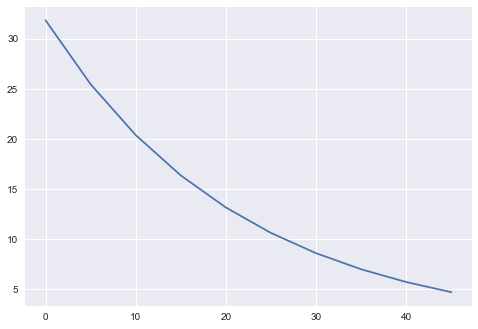

In [22]:
# 学習曲線の表示 (最初の10個分を除く)
plt.plot(history[:,0], history[:,1])
plt.show()

In [28]:
EPOCHS = 500

In [29]:
import pandas as pd

df = pd.read_csv('winequality-red.csv', sep=';')

x = df[['density', 'volatile acidity']]
y = df[['alcohol']]

x = x.values
x = np.insert(x, 0, 1.0, axis=1)
y = y.values.T[0]

In [30]:
weights, history = gradient_method(x, y, epochs=EPOCHS)

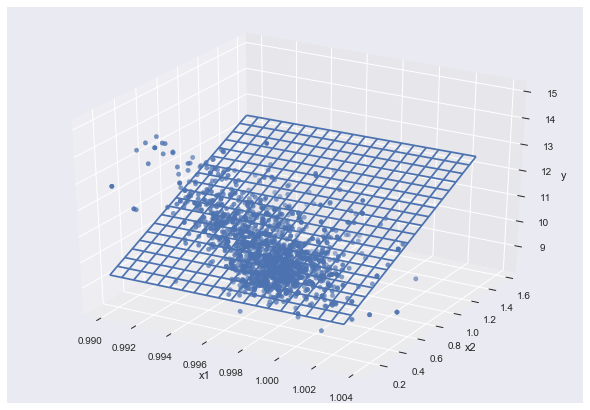

In [31]:
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure()
ax=Axes3D(fig)

y = df[['alcohol']]
x1 = df[['density']]
x2 = df[['volatile acidity']]

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

mesh_x1 = np.arange(x1.min()[0], x1.max()[0], (x1.max()[0]-x1.min()[0])/20)
mesh_x2 = np.arange(x2.min()[0], x2.max()[0], (x2.max()[0]-x2.min()[0])/20)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = weights[1] * mesh_x1 + weights[2] * mesh_x2 + weights[0]
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
plt.show()

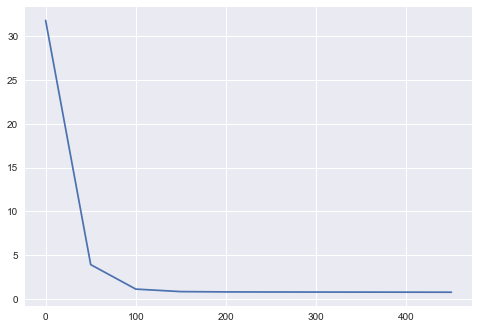

In [32]:
# 学習曲線の表示 (最初の10個分を除く)
plt.plot(history[:,0], history[:,1])
plt.show()

## 参考


https://qiita.com/MahoTakara/items/0d7284774c2adf1f05ec